# Movie Recommendation System

### Problem Statement

To make a recommender system using different algorithms and comparing the better working algorithm with relavant predictions.

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn

# genre recommendation system
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### About the dataset

Movie lens dataset is the popular and widely used dataset in the field of recommender systems and machine learning

The dataset was initially created by the GroupLens research group at the University of Minnesota and has since been maintained and updated by various contributors.

The MovieLens dataset contains information about movies, user ratings.

Movies dataset includes movie names, genres. User ratings dataset include the userid, movieid and ratings of the movie.

The ratings are provided by users who have watched and rated the movies on a scale typically ranging from 1 to 5, representing their preference or opinion.

https://grouplens.org/datasets/movielens/

## Loading the datasets

In [5]:
movies_df = pd.read_csv('movies.csv')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [49]:
rating_df = pd.read_csv('ratings.csv')
rating_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Checking which rating is the highest

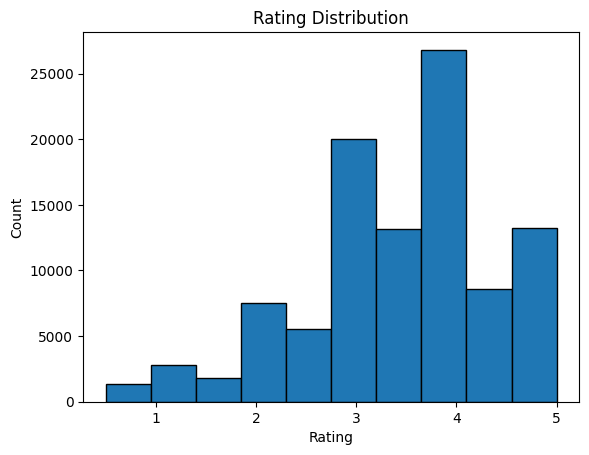

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ratings data
ratings_df = pd.read_csv('ratings.csv')

# Plot the rating distribution
plt.hist(ratings_df['rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


Checking which genre repeats more

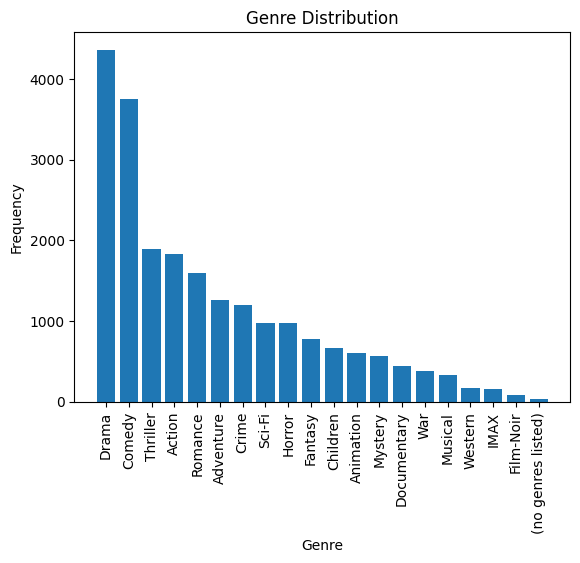

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the movies data
movies_df1 = pd.read_csv('movies.csv')

# Split the genres column into individual genres
movies_df1['genres'] = movies_df1['genres'].str.split('|')

# Count the frequency of each genre
genre_counts = movies_df1['genres'].explode().value_counts()

# Plot the genre distribution
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.show()


We performed sampling as the computer cannot handle 1 lakh rows, so we took 10% row for the model

In [51]:
ratings_sample = rating_df.sample(frac=0.1, random_state=42)
ratings_sample

,userId,movieId,rating,timestamp
67037,432,77866,4.5,1335139641
42175,288,474,3.0,978465565
93850,599,4351,3.0,1498524542
6187,42,2987,4.0,996262677
12229,75,1610,4.0,1158989841
...,...,...,...,...
52065,339,1580,2.0,1460182455
92269,597,1090,5.0,941639399
18346,116,30749,4.5,1337199535
17425,111,5025,3.0,1516141691


## Data Cleaning

In [52]:
ratings_sample = ratings_sample.dropna()

## Data Preprocessing

Merged the datasets to know the user ratings for each movie

In [53]:
# Merge the datasets
Usr_Ratings = pd.merge(movies_df, ratings_sample, on = 'movieId')
Usr_Ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,57,5.0,965796031
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,191,4.0,829759809
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,166,5.0,1189980529
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,229,5.0,838144316
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,364,5.0,869443366
...,...,...,...,...,...,...
10079,183897,Isle of Dogs (2018),Animation|Comedy,338,1.5,1530148463
10080,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,380,3.0,1531351193
10081,189043,Boundaries (2018),Comedy|Drama,338,2.5,1530148447
10082,189547,Iron Soldier (2010),Action|Sci-Fi,210,1.0,1528486011


In [ ]:
Usr_Ratings.corr()

<ipython-input-30-2cc3b1d8d3dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Usr_Ratings.corr()


,movieId,userId,rating,timestamp
movieId,1.000000,0.02595,-0.015803,0.504685
userId,0.025950,1.00000,-0.025910,0.105980
rating,-0.015803,-0.02591,1.000000,-0.011356
timestamp,0.504685,0.10598,-0.011356,1.000000


## Content-based Filtering



## i. Genre based recommendation

#### Data Modeling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cv = CountVectorizer()
print(Usr_Ratings["genres"][:5])
count_matrix = cv.fit_transform(Usr_Ratings["genres"])
print("Count Matrix:", count_matrix.toarray())

0    Adventure|Animation|Children|Comedy|Fantasy
1    Adventure|Animation|Children|Comedy|Fantasy
2    Adventure|Animation|Children|Comedy|Fantasy
3    Adventure|Animation|Children|Comedy|Fantasy
4    Adventure|Animation|Children|Comedy|Fantasy
Name: genres, dtype: object
Count Matrix: [[0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [ ]:
cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 1.        , 1.        , ..., 0.31622777, 0.        ,
        0.31622777],
       [1.        , 1.        , 1.        , ..., 0.31622777, 0.        ,
        0.31622777],
       [1.        , 1.        , 1.        , ..., 0.31622777, 0.        ,
        0.31622777],
       ...,
       [0.31622777, 0.31622777, 0.31622777, ..., 1.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.31622777, 0.31622777, 0.31622777, ..., 0.5       , 0.        ,
        1.        ]])

#### Data Recommendation

In [86]:
print('Genre of '+'Isle of Dogs (2018)'+' is ' + Usr_Ratings[Usr_Ratings.title == movie_title]['genres'])
      

Genre of Isle of Dogs (2018) is Crime|Drama


Took the movie name, to find which user likes the movie most. If user-1 likes the movie the movie example: Isle of Dogs (2018), below predicted movies are recommended to the user-1

In [ ]:
test_user_movie = 'Isle of Dogs (2018)'
movie_index = Usr_Ratings[Usr_Ratings.title == test_user_movie]["movieId"].idxmax()

In [ ]:
movie_index

10079

In [ ]:
similar_movies = list(enumerate(cosine_sim[movie_index]))
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

In [ ]:
i=0
top_15_genre = []
for movie in sorted_similar_movies:
    id = sorted_similar_movies[i][0]
    k = Usr_Ratings[Usr_Ratings.movieId == id]
    if not k.empty:
        top_15_genre.append(k.values[0][1])
    if len(top_15_genre)>=15:
        break
    else:
        i+=1
print(top_15_genre)

['Species II (1998)', 'Major League: Back to the Minors (1998)', 'War of the Roses, The (1989)', 'Purple Rain (1984)', 'Dead Man Walking (1995)', 'Clueless (1995)', 'Richard III (1995)', 'Dead Presidents (1995)', 'Muppet Treasure Island (1996)', 'Braveheart (1995)', 'Taxi Driver (1976)', 'Rumble in the Bronx (Hont faan kui) (1995)', 'Before and After (1996)', 'Outbreak (1995)', 'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)']


## ii. Genre-Rating based recommendations

In [ ]:
# Compute the average rating for each movie
average_ratings = Usr_Ratings.groupby('movieId')['rating'].mean().reset_index(name='average_rating')

# Compute the number of ratings for each movie
rating_counts = Usr_Ratings.groupby('movieId')['rating'].count().reset_index(name='num_ratings')

In [ ]:
# Compute number of unique movies rated by each user
user_ratings_count = Usr_Ratings.groupby('userId')['movieId'].nunique().reset_index(name='num_movies_rated')

In [ ]:
# Merge the average rating and rating count data with the movie data
movies_with_ratings = pd.merge(movies_df, average_ratings, on='movieId')
movies_with_ratings = pd.merge(Usr_Ratings, rating_counts, on='movieId')

#### Data modeling

In [ ]:
movies_with_ratings

,movieId,title,genres,userId,rating,timestamp,num_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,57,5.0,965796031,20
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,191,4.0,829759809,20
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,166,5.0,1189980529,20
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,229,5.0,838144316,20
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,364,5.0,869443366,20
...,...,...,...,...,...,...,...
10079,183897,Isle of Dogs (2018),Animation|Comedy,338,1.5,1530148463,1
10080,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,380,3.0,1531351193,1
10081,189043,Boundaries (2018),Comedy|Drama,338,2.5,1530148447,1
10082,189547,Iron Soldier (2010),Action|Sci-Fi,210,1.0,1528486011,1


In [ ]:
genre_vectorizer = CountVectorizer(token_pattern=r'[^\s,|]+')
genre_matrix = genre_vectorizer.fit_transform(movies_with_ratings['genres'].str.replace('|', ' '))

<ipython-input-32-f00105299f88>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  genre_matrix = genre_vectorizer.fit_transform(movies_with_ratings['genres'].str.replace('|', ' '))


In [ ]:
# Convert the genre information into a bag-of-words representation
genre_vectorizer = CountVectorizer(token_pattern=r'[^\s,]+')
genre_matrix = genre_vectorizer.fit_transform(movies_with_ratings['genres'])

In [ ]:
# Compute the cosine similarity between movies based on their genre information
genre_similarity = cosine_similarity(genre_matrix)

In [ ]:
genre_similarity

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Compute the weighted average rating for each movie, where the weights are the cosine similarities between movies
weighted_ratings = movies_with_ratings['rating'] * movies_with_ratings['num_ratings']
weighted_average_ratings = weighted_ratings.groupby(movies_with_ratings['movieId']).sum() / movies_with_ratings['num_ratings'].sum()

# Create a new DataFrame with the weighted average ratings
weighted_ratings_df = pd.DataFrame({'movieId': weighted_average_ratings.index, 'weighted_average_rating': weighted_average_ratings.values})

# Merge the weighted average ratings with the movies_with_ratings DataFrame
movies_with_ratings = movies_with_ratings.merge(weighted_ratings_df, on='movieId')


In [ ]:
movies_with_ratings

,movieId,title,genres,userId,rating,timestamp,num_ratings,weighted_average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,57,5.0,965796031,20,0.024072
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,191,4.0,829759809,20,0.024072
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,166,5.0,1189980529,20,0.024072
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,229,5.0,838144316,20,0.024072
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,364,5.0,869443366,20,0.024072
...,...,...,...,...,...,...,...,...
10079,183897,Isle of Dogs (2018),Animation|Comedy,338,1.5,1530148463,1,0.000022
10080,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,380,3.0,1531351193,1,0.000044
10081,189043,Boundaries (2018),Comedy|Drama,338,2.5,1530148447,1,0.000037
10082,189547,Iron Soldier (2010),Action|Sci-Fi,210,1.0,1528486011,1,0.000015


In [ ]:
# Compute the cosine similarity between movies based on their weighted average ratings and genre information
features = genre_similarity * movies_with_ratings['weighted_average_rating'].values.reshape(-1, 1)
weighted_similarity = cosine_similarity(features)
weighted_similarity

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Data Recommendation

Took the movie name, to find which user likes the movie most. If user-1 likes the movie the movie example: Isle of Dogs (2018), below predicted movies are recommended to the user-1. Here, user ratings and genres are used to find the recommendations after liking particular movie.

In [78]:
movie_title = 'Isle of Dogs (2018)'
movie_index = Usr_Ratings[Usr_Ratings.title == movie_title]["movieId"].idxmax()

In [ ]:
movie_index

10079

In [ ]:
filtered_rows = Usr_Ratings[Usr_Ratings['title'] == movie_title]

# Get the genre of the movie
genre = filtered_rows['genres'].iloc[0]
genre

'Animation|Comedy'

In [ ]:
similar_movies = list(enumerate(weighted_similarity[movie_index]))
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

In [ ]:
i=0
top_15 = []
for movie in sorted_similar_movies:
    id = sorted_similar_movies[i][0]
    k = movies_with_ratings[movies_with_ratings.movieId == id]
    if not k.empty:
        top_15.append(k.values[0][1])
    if len(top_15)>=15:
        break
    else:
        i+=1
print(top_15)
# https://stackoverflow.com/questions/19828822/how-to-check-whether-a-pandas-dataframe-is-empty

['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)', 'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)', 'Sudden Death (1995)', 'GoldenEye (1995)', 'American President, The (1995)', 'Dracula: Dead and Loving It (1995)', 'Balto (1995)', 'Nixon (1995)', 'Cutthroat Island (1995)']


## Comparision

In [ ]:
filtered_rows_genre = Usr_Ratings[Usr_Ratings['title'].isin(top_15_genre)]
filtered_rows_genre

,movieId,title,genres,userId,rating,timestamp
195,36,Dead Man Walking (1995),Crime|Drama,198,5.0,1034136028
196,36,Dead Man Walking (1995),Crime|Drama,103,4.0,1431957252
197,36,Dead Man Walking (1995),Crime|Drama,109,5.0,841143673
198,36,Dead Man Walking (1995),Crime|Drama,33,5.0,939715317
199,36,Dead Man Walking (1995),Crime|Drama,112,0.5,1513989966
...,...,...,...,...,...,...
3601,1862,Species II (1998),Horror|Sci-Fi,608,2.5,1117506683
3602,1862,Species II (1998),Horror|Sci-Fi,66,1.0,1113190775
3603,1863,Major League: Back to the Minors (1998),Comedy,448,3.0,1019128877
6346,4681,"War of the Roses, The (1989)",Comedy|Drama,221,4.0,1111178392


In [ ]:
filtered_rows = Usr_Ratings[Usr_Ratings['title'].isin(top_15)]
filtered_rows

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,57,5.0,965796031
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,191,4.0,829759809
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,166,5.0,1189980529
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,229,5.0,838144316
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,364,5.0,869443366
...,...,...,...,...,...,...
85,13,Balto (1995),Adventure|Animation|Children,19,3.0,965709102
86,14,Nixon (1995),Drama,521,4.0,852713185
87,14,Nixon (1995),Drama,109,4.0,841109326
88,15,Cutthroat Island (1995),Action|Adventure|Romance,284,4.0,832699795


In the above comparision, genre recommendation system has the crime and drama recommendations but also gave some low rating recommendations from 3603 to 7619.

On the other hand, genre-rating recommendation recommended the same genre movies and also other movies with high rating.

## Using machine learning models


## Clustering technique - KNN recommendation system

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
Usr_Ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,57,5.0,965796031
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,191,4.0,829759809
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,166,5.0,1189980529
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,229,5.0,838144316
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,364,5.0,869443366
...,...,...,...,...,...,...
10079,183897,Isle of Dogs (2018),Animation|Comedy,338,1.5,1530148463
10080,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,380,3.0,1531351193
10081,189043,Boundaries (2018),Comedy|Drama,338,2.5,1530148447
10082,189547,Iron Soldier (2010),Action|Sci-Fi,210,1.0,1528486011


In [ ]:
pivot_table = pd.pivot_table(Usr_Ratings, values='rating', index='userId', columns='movieId', fill_value=0)

In [ ]:
pivot_table

movieId,1,2,3,4,5,6,7,8,9,10,...,180095,180985,181065,181659,182727,183897,187593,189043,189547,193567
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0
2,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0
3,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0
4,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0
5,4.0,0.0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0
607,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0
608,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0


In [ ]:
# Fit a k-NN model on the pivot table
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(pivot_table)

NearestNeighbors(algorithm='brute', metric='cosine')

for userid-1, the knn algorithm will find the similar items for which the user liked the movie

In [ ]:
# Get the top 10 nearest neighbors for user with userId 1
user = pivot_table.iloc[1]
distances, indices = model.kneighbors([user], n_neighbors=11)

In [ ]:
# Print the recommended movies
recommended_movies = []
for i in range(1, len(indices[0])):
    movie_id = pivot_table.columns[indices[0][i]]
    recommended_movies.append(movies_df.loc[movies_df['movieId'] == movie_id]['title'].values[0])
print(recommended_movies)

["William Shakespeare's Romeo + Juliet (1996)", 'Aliens (1986)', 'High School High (1996)', 'Fled (1996)', 'Very Brady Sequel, A (1996)', 'Adventures of Pinocchio, The (1996)', 'First Wives Club, The (1996)', 'Ransom (1996)', 'Matilda (1996)', 'Crow: City of Angels, The (1996)']


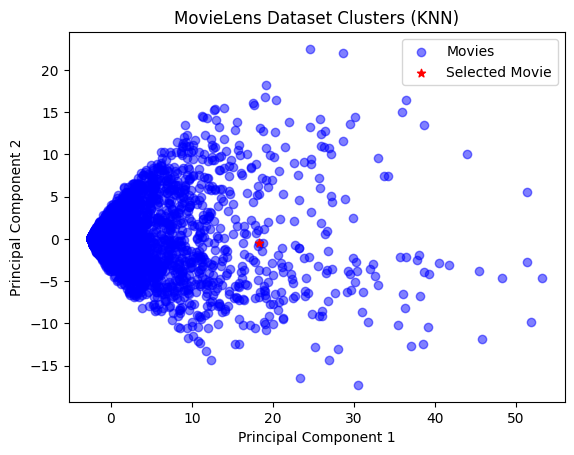

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# Load the MovieLens dataset
movies = pd.read_csv('movies.csv')  # Replace 'movies.csv' with the path to your movies dataset file
ratings = pd.read_csv('ratings.csv')  # Replace 'ratings.csv' with the path to your ratings dataset file

# Merge the movies and ratings dataframes
data = pd.merge(movies, ratings, on='movieId')

# Create a pivot table of user ratings
pivot_table = data.pivot_table(index='movieId', columns='userId', values='rating', fill_value=0)

# Instantiate the KNN model
knn = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')

# Fit the model on the pivot table
knn.fit(pivot_table.values)

# Choose a movie for which you want to find similar movies
movie_index = 1  # Replace with the index of the movie you want to find similar movies for

# Get the distances and indices of the nearest neighbors
distances, indices = knn.kneighbors(pivot_table.iloc[movie_index].values.reshape(1, -1))

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(pivot_table.values)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', alpha=0.5, label='Movies')
plt.scatter(reduced_data[movie_index, 0], reduced_data[movie_index, 1], c='red', marker='*', label='Selected Movie')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MovieLens Dataset Clusters (KNN)')
plt.legend()
plt.show()


 This single cluster indicates that the movies in the dataset are relatively similar to each other in terms of user ratings. The dataset can have Similar User Preferences, Limited Variability, Homogeneous Dataset, Model Parameters

 Similar User Preferences is occured as the user has rated almost all the different genre movies. which can be the reason of single cluster

 Limited Variability is the case, but the data has 1 lakh row, we don't think this can be the reason.

 We would like to look up the parameters change

In [101]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import adjusted_rand_score

# Load the MovieLens dataset
movies = pd.read_csv('movies.csv')  # Replace 'movies.csv' with the path to your movies dataset file
ratings = pd.read_csv('ratings.csv')  # Replace 'ratings.csv' with the path to your ratings dataset file

# Merge the movies and ratings dataframes
data = pd.merge(movies, ratings, on='movieId')

# Create a pivot table of user ratings
pivot_table = data.pivot_table(index='movieId', columns='userId', values='rating', fill_value=0)

# Separate the features (user ratings) and the target variable (not used in unsupervised learning)
X = pivot_table.values
y = pivot_table.index  # Assuming the movieId column is used as the target variable

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Specify the values you want to explore for the number of neighbors (K)
    'metric': ['euclidean', 'manhattan', 'cosine']  # Specify the distance metrics to consider
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search using K-fold cross-validation
kfold_cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='adjusted_rand_score', cv=kfold_cv)
grid_search.fit(X, y)

# Print the best parameter combination and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 3}
Best Score:  0.0


In [102]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler

# Load the MovieLens dataset
movies = pd.read_csv('movies.csv')  # Replace 'movies.csv' with the path to your movies dataset file
ratings = pd.read_csv('ratings.csv')  # Replace 'ratings.csv' with the path to your ratings dataset file

# Merge the movies and ratings dataframes
data = pd.merge(movies, ratings, on='movieId')

# Create a pivot table of user ratings
pivot_table = data.pivot_table(index='movieId', columns='userId', values='rating', fill_value=0)

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_table.values)

# Define the list of clustering algorithms to try
clustering_algorithms = [
    KMeans(n_clusters=3),
    AgglomerativeClustering(n_clusters=3),
    DBSCAN(eps=0.5, min_samples=5)
]

# Evaluate each clustering algorithm
for algorithm in clustering_algorithms:
    algorithm.fit(scaled_data)
    labels = algorithm.labels_

    # Evaluate the clustering using silhouette score and adjusted Rand index
    silhouette = silhouette_score(scaled_data, labels)
    rand_index = adjusted_rand_score(pivot_table.index, labels)

    print(f"Algorithm: {algorithm.__class__.__name__}")
    print(f"Silhouette Score: {silhouette}")
    print(f"Adjusted Rand Index: {rand_index}")
    print("------------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Algorithm: KMeans
Silhouette Score: 0.7391760810737888
Adjusted Rand Index: 0.0
------------------------------
Algorithm: AgglomerativeClustering
Silhouette Score: 0.6978039644552814
Adjusted Rand Index: 0.0
------------------------------
Algorithm: DBSCAN
Silhouette Score: -0.1830326839703043
Adjusted Rand Index: 0.0
------------------------------


Here all three algorithms (K-means, Agglomerative Clustering, and DBSCAN) have an adjusted Rand index of 0.0 suggests that there is no alignment between the predicted clusters and the true clusters (if available). This indicates that the clustering results do not match the expected cluster structure or any ground truth labels that might exist in the dataset.

Additionally, looking at the silhouette scores can provide further insights into the quality of the clustering results. A silhouette score near 1 indicates well-separated clusters, while a score close to 0 suggests overlapping or poorly defined clusters. A negative silhouette score indicates that samples might have been assigned to incorrect clusters.

In your case, the **K-means algorithm** achieved a relatively high silhouette score of 0.739, indicating reasonably well-separated clusters. However, both the Agglomerative Clustering algorithm and DBSCAN algorithm produced lower silhouette scores (0.698 and -0.183, respectively), suggesting less distinct or potentially overlapping clusters.

These results imply that the dataset may not naturally exhibit clear cluster patterns, or the chosen algorithms and parameters may not be suitable for capturing the underlying structure. It's important to further analyze the dataset, consider alternative clustering techniques, or explore different feature representations to uncover meaningful clusters.

## Collaborative filtering model

## i.user-item based recommendation

Here the similarities between users and items are used to make personalized recommendations. This technique is based on the assumption that users who have similar preferences in the past are likely to have similar preferences in the future, and that items that are liked by similar users are likely to be liked by a target user.

user_item matrix is created to find the similarities

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
ratings_df = pd.read_csv('ratings.csv')

# Create the user-item matrix
user_item_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Compute the user similarity matrix using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)

# Define a function to recommend movies for a given user
def recommend_movies(user_id, top_n=5):
    # Get the similarity scores for the given user
    user_scores = user_similarity[user_id-1]

    # Sort the user scores in descending order
    sorted_scores_indices = sorted(enumerate(user_scores), key=lambda x: x[1], reverse=True)

    # Get the top N similar users
    top_similar_users = [i+1 for i, _ in sorted_scores_indices[:top_n]]

    # Get the movies not yet rated by the given user
    user_movies = user_item_matrix.loc[user_id]
    unrated_movies = user_movies[user_movies == 0].index

    # Calculate the average rating for each unrated movie by the top similar users
    movie_ratings = user_item_matrix.loc[top_similar_users, unrated_movies]
    avg_ratings = movie_ratings.mean()

    # Sort the unrated movies by average rating in descending order
    sorted_movies = avg_ratings.sort_values(ascending=False)

    # Get the top N recommended movies
    recommended_movies = sorted_movies.index[:top_n]

    return recommended_movies

# Example usage
user_id = 1
recommended_movies = recommend_movies(user_id)
print(f"Recommended movies for User {user_id}:")
print(recommended_movies)


Recommended movies for User 1:
Int64Index([1200, 1610, 1036, 589, 924], dtype='int64', name='movieId')


In [6]:
specific_movies = movies_df.loc[movies_df['movieId'].isin(recommended_movies.tolist())]
list(specific_movies['title'])

['Terminator 2: Judgment Day (1991)',
 '2001: A Space Odyssey (1968)',
 'Die Hard (1988)',
 'Aliens (1986)',
 'Hunt for Red October, The (1990)']

In [35]:
ratings_df.loc[ratings_df['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [22]:
k = movies_df[movies_df['title'].isin(specific_movies['title'])]
k

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
793,1036,Die Hard (1988),Action|Crime|Thriller
902,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi
1211,1610,"Hunt for Red October, The (1990)",Action|Adventure|Thriller


In [34]:
ratings_df.loc[ratings_df['movieId'].isin(k['movieId'])].sort_values('rating', ascending=False)

,userId,movieId,rating,timestamp
99611,610,1200,5.0,1479544099
32097,220,1200,5.0,1230061519
33883,231,1200,5.0,1433089483
33880,231,1036,5.0,1433089494
33877,231,589,5.0,1433089491
...,...,...,...,...
41079,279,589,4.0,1506394357
41085,279,924,4.0,1506394394
10046,66,1036,4.0,1093747439
27578,187,924,4.0,1161850326


Above are the recommended movies for the user-1 and analysis with the movie ratings. These are the recommendations from the likable movies of the user-1. we see user-1 likes all the genre movies, but we see action movies are more likes by the user. So, the recommendations are as above.

## Hybrid Algorithms

In [39]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095417 sha256=c0488cdb3e68aebf6395a5322082957c4d48017cdc0a1650e4ee773a8acc7f46
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## KNNBasic

In [56]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the ratings data
ratings_df = pd.read_csv('ratings.csv')

# Prepare the data for Surprise library
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create a user-item collaborative filtering model
model = KNNBasic(k=50, sim_options={'user_based': True})

# Train the model on the training set
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model using evaluation metrics
accuracy.rmse(predictions)
accuracy.mae(predictions)

# Example usage to get top-N recommendations for a user
target_user_id = 1
top_n = 5

target_user_items = ratings_df[ratings_df['userId'] == target_user_id]['movieId'].values
target_user_items = list(set(target_user_items))  # Remove duplicates

recommended_items = []
for item_id in range(1, ratings_df['movieId'].nunique() + 1):
    if item_id not in target_user_items:
        predicted_rating = model.predict(target_user_id, item_id).est
        recommended_items.append((item_id, predicted_rating))

recommended_items.sort(key=lambda x: x[1], reverse=True)
top_recommended_items = recommended_items[:top_n]

movie_title = []
print("Top {} recommended items for User {}:".format(top_n, target_user_id))
for item_id, predicted_rating in top_recommended_items:
    item_title = movies_df[movies_df['movieId'] == item_id]['title'].values[0]
    movie_title.append(item_title)
    print("Item ID: {}, Title: {}, Predicted Rating: {}".format(item_id, item_title, predicted_rating))


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9600
MAE:  0.7355
Top 5 recommended items for User 1:
Item ID: 99, Title: Heidi Fleiss: Hollywood Madam (1995), Predicted Rating: 5
Item ID: 148, Title: Awfully Big Adventure, An (1995), Predicted Rating: 5
Item ID: 467, Title: Live Nude Girls (1995), Predicted Rating: 5
Item ID: 495, Title: In the Realm of the Senses (Ai no corrida) (1976), Predicted Rating: 5
Item ID: 506, Title: Orlando (1992), Predicted Rating: 5


In [55]:
Usr_Ratings.loc[Usr_Ratings['userId'] == 1].sort_values('rating', ascending=False)

,movieId,title,genres,userId,rating,timestamp
3980,2115,Indiana Jones and the Temple of Doom (1984),Action|Adventure|Fantasy,1,5.0,964982529
3890,2048,"Great Mouse Detective, The (1986)",Action|Animation|Children|Crime,1,5.0,964982791
4485,2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,1,5.0,964982242
5068,2991,Live and Let Die (1973),Action|Adventure|Thriller,1,5.0,964982271
4418,2459,"Texas Chainsaw Massacre, The (1974)",Horror,1,5.0,964983414
4325,2387,Very Bad Things (1998),Comedy|Crime,1,5.0,964983123
4265,2353,Enemy of the State (1998),Action|Thriller,1,5.0,964983861
1671,596,Pinocchio (1940),Animation|Children|Fantasy|Musical,1,5.0,964982838
3922,2078,"Jungle Book, The (1967)",Animation|Children|Comedy|Musical,1,5.0,964982838
3701,1954,Rocky (1976),Drama,1,5.0,964982176


In [57]:
k = movies_df[movies_df['title'].isin(movie_title)]
k

,movieId,title,genres
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary
121,148,"Awfully Big Adventure, An (1995)",Drama
405,467,Live Nude Girls (1995),Comedy
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama
441,506,Orlando (1992),Drama|Fantasy|Romance


These are the recommendations from the likable movies of the user-1. we see user-1 likes all the genre movies, but action are most repeated. Here, Found movie which is Documentary. which is not the top-most likability of user-1

## RandomForestRegressor

In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the ratings data
ratings_df = pd.read_csv('ratings.csv')

# Prepare the data for Surprise library
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Convert Surprise data to pandas DataFrame
train_df = pd.DataFrame(trainset.all_ratings(), columns=['userId', 'movieId', 'rating'])

# Create feature matrix and target variable
X_train = train_df[['userId', 'movieId']]
y_train = train_df['rating']

# Create a Random Forest model
model = RandomForestRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

# Convert Surprise test data to pandas DataFrame
test_df = pd.DataFrame(testset, columns=['userId', 'movieId', 'rating'])

# Make predictions on the test set
X_test = test_df[['userId', 'movieId']]
y_test = test_df['rating']
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 1.2013086600774476


Got the rmse value is 1.2. So, found the error is high. with high errors, this model cannot be used.

## Matrix Factorixation - SVD recommendation

In [58]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
ratings_pivot = rating_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

In [60]:
ratings_pivot

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
ratings_sparse = csr_matrix(ratings_pivot.values)

In [62]:
ratings_sparse.shape

(610, 9724)

In [63]:
# Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=50)
latent_matrix = svd.fit_transform(ratings_sparse)

In [64]:
# Compute item-item similarity matrix
item_sim_matrix = cosine_similarity(latent_matrix)
item_sim_matrix_transposed = item_sim_matrix.T

In [65]:
item_sim_matrix_transposed.shape

(610, 610)

In [67]:
user_ratings = ratings_pivot.loc[1, :].values

In [68]:
user_ratings.shape

(9724,)

In [69]:
def recommend_movies(user_id, num_recommendations=5):
    # Get the user's ratings
    user_ratings = pivot_table.loc[user_id, :].values

    # Calculate the predicted ratings by multiplying the user ratings with item similarity matrix
    predicted_ratings = np.dot(item_sim_matrix, user_ratings) / np.sum(item_sim_matrix, axis=1)

    # Sort the predicted ratings in descending order and get the top recommended movies
    recommended_movie_indices = np.argsort(predicted_ratings)[::-1][:num_recommendations]
    recommended_movies = pivot_table.columns[recommended_movie_indices]

    return recommended_movies

In [70]:
from scipy.sparse.linalg import svds

def recommend_movies(user_id, num_recommendations):
    # Perform SVD decomposition on the user-item matrix
    U, sigma, Vt = svds(item_sim_matrix, k=20)  # Adjust the value of k as per your preference

    # Convert the sigma values into a diagonal matrix
    sigma = np.diag(sigma)

    # Calculate the predicted ratings by multiplying the decomposed matrices
    predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Get the user's predicted ratings
    user_predicted_ratings = predicted_ratings[user_id, :]

    # Sort the predicted ratings in descending order and get the top recommended movies
    recommended_movie_indices = np.argsort(user_predicted_ratings)[::-1][:num_recommendations]
    recommended_movies = ratings_pivot.columns[recommended_movie_indices]

    return recommended_movies


In [71]:
# Test the recommendation system for a specific user
user_id = 1
recommended_movies = recommend_movies(user_id,10)
print(f"Recommended movies for User {user_id}:")
print(recommended_movies)

Recommended movies for User 1:
Int64Index([2, 72, 262, 149, 653, 433, 714, 633, 597, 497], dtype='int64', name='movieId')


In [72]:
specific_movies = movies_df.loc[movies_df['movieId'].isin(recommended_movies.tolist())]
list(specific_movies['title'])

['Jumanji (1995)',
 'Kicking and Screaming (1995)',
 'Amateur (1994)',
 'Little Princess, A (1995)',
 'Clean Slate (1994)',
 'Much Ado About Nothing (1993)',
 'Pretty Woman (1990)',
 'Denise Calls Up (1995)',
 'Dragonheart (1996)',
 'Dead Man (1995)']

In [74]:
k = movies_df[movies_df['title'].isin(specific_movies['title'])]
k

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
64,72,Kicking and Screaming (1995),Comedy|Drama
122,149,Amateur (1994),Crime|Drama|Thriller
226,262,"Little Princess, A (1995)",Children|Drama
377,433,Clean Slate (1994),Comedy
434,497,Much Ado About Nothing (1993),Comedy|Romance
514,597,Pretty Woman (1990),Comedy|Romance
536,633,Denise Calls Up (1995),Comedy
549,653,Dragonheart (1996),Action|Adventure|Fantasy
581,714,Dead Man (1995),Drama|Mystery|Western


Above are the recommended movies for user-1. There are more action an drama movies.

# Observations



*   Every prediction is done using the movies already watched and predicts the movie the user haven't watched.
*   The content based recommendation is done by the genre and genre-rating preferences, we found that the genre recommendations are by only genres are low rated movies are found are the last with the same genres. In genre-rating we found that the similar genres with high ratings as the recommendations.
*   Using clustering techniques we found that the model has one cluster, and used hyper parameter tuning and found knn is better technique to use

*   Collaborative filtering is used so that we create a matrix, found the recommendations are formed in less time
*   Matrix factorization is used with svd and got the better recommendations with the more genres related and hgh rating



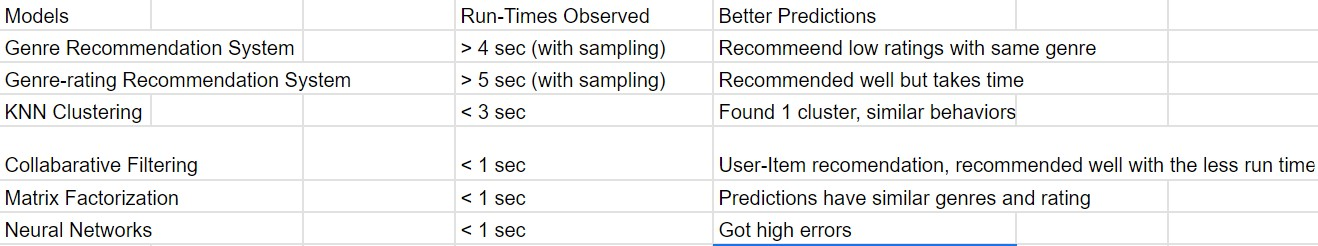

Matrix Factorization method is the most used method. we got better results from it. As the user preference models are selected. In the above for user-1 comedy and drama movies are recommmended.